# 🚙**Project: Machine Learning Model for Auto Insurance Pricing**🚙
---
## **Instructor:**  
- **Harpreet Virk**

## **Contributors:**  
- **Lu Dang Duy Khanh**
- **Truc Anh Nguyen**
- **Bassey Elliot**
- **Papa Kofi Arhin**

## **College & Course:**  
**St. Clair College / DAB422-26W-002 CAPSTONE PROJECT 2 Winter 2026 - 002**

---

# <center> **Introduction**  

This project focuses on developing machine learning models to `predict motor insurance premiums` using policyholder, vehicle, claims, and policy data. By leveraging AI, the model captures complex, nonlinear patterns beyond traditional methods, enabling accurate premium forecasts and data-driven recommendations for pricing adjustments and risk mitigation.

## Part 1: Data Preprocessing & Cleaning

#### Import libraries

In [1]:
# Import the essential libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#### Data Pre-processing 

In [2]:
# Read CSV without initial date parsing
df = pd.read_csv('Motor vehicle insurance data.csv',delimiter=';')

df.head()

,ID,Date_start_contract,Date_last_renewal,Date_next_renewal,Date_birth,Date_driving_licence,Distribution_channel,Seniority,Policies_in_force,Max_policies,...,Area,Second_driver,Year_matriculation,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Length,Weight
0,1,05/11/2015,05/11/2015,05/11/2016,15/04/1956,20/03/1976,0,4,1,2,...,0,0,2004,80,599,7068.0,0,P,NaN,190
1,1,05/11/2015,05/11/2016,05/11/2017,15/04/1956,20/03/1976,0,4,1,2,...,0,0,2004,80,599,7068.0,0,P,NaN,190
2,1,05/11/2015,05/11/2017,05/11/2018,15/04/1956,20/03/1976,0,4,2,2,...,0,0,2004,80,599,7068.0,0,P,NaN,190
3,1,05/11/2015,05/11/2018,05/11/2019,15/04/1956,20/03/1976,0,4,2,2,...,0,0,2004,80,599,7068.0,0,P,NaN,190
4,2,26/09/2017,26/09/2017,26/09/2018,15/04/1956,20/03/1976,0,4,2,2,...,0,0,2004,80,599,7068.0,0,P,NaN,190


Transform date time columns into time series format

In [3]:
# List of date columns to enforce conversion with errors='coerce'
date_columns = list(df.columns[1:6]) + ['Date_lapse'] 

# Apply pd.to_datetime with errors='coerce' to each date column
for column in df.columns:
    if column in date_columns:
        df[column] = pd.to_datetime(df[column], errors='coerce', format="%d/%m/%Y")

Transform categorical values back to the right data type

In [4]:
# Select categorical columns
cat_cols = ['Distribution_channel', 'Payment', 'Type_risk', 'Area', 'Second_driver', 'N_doors', 'Type_fuel']

for col in cat_cols:
    df[col] = df[col].astype('object')

We keep only the latest record of each ID because it contains all historical static customer data while reflecting their most current policy status and renewal timeline.

In [5]:
df = df.loc[df.groupby('ID')['Date_last_renewal'].idxmax()].reset_index(drop=True)
df.head()

,ID,Date_start_contract,Date_last_renewal,Date_next_renewal,Date_birth,Date_driving_licence,Distribution_channel,Seniority,Policies_in_force,Max_policies,...,Area,Second_driver,Year_matriculation,Power,Cylinder_capacity,Value_vehicle,N_doors,Type_fuel,Length,Weight
0,1,2015-11-05,2018-11-05,2019-11-05,1956-04-15,1976-03-20,0,4,2,2,...,0,0,2004,80,599,7068.00,0,P,NaN,190
1,2,2017-09-26,2018-09-26,2019-09-26,1956-04-15,1976-03-20,0,4,2,2,...,0,0,2004,80,599,7068.00,0,P,NaN,190
2,3,2013-11-29,2018-11-29,2019-11-29,1975-03-18,1995-07-10,0,15,1,2,...,0,0,2013,85,1229,16030.00,5,P,3.999,1105
3,4,2016-10-21,2018-10-21,2019-10-21,1973-07-10,1993-07-05,0,3,2,2,...,0,0,1986,6,74,1261.82,0,P,NaN,87
4,5,2017-05-12,2018-05-12,2019-05-12,1973-07-10,1993-07-05,0,3,2,2,...,0,0,1986,6,244,3000.00,0,P,NaN,92


#### Data Cleaning 

Check Duplicate

In [6]:
#Check for any duplicate values in the Dataframe df
df.duplicated().any()

False

Checking missing values and cardinality of each feature

In [7]:
def sniff_modified(df):
    with pd.option_context("display.max_colwidth", 20):
        info = pd.DataFrame()
        info['data type'] = df.dtypes
        info['percent missing'] = df.isnull().sum()*100/len(df)
        info['No. unique'] = df.apply(lambda x: len(x.unique()))
        info['unique values'] = df.apply(lambda x: x.unique())
        info['data type'] = info['data type'].astype(str)   # ← convert to string
        return info.sort_values('data type')
    
sniffed_df = sniff_modified(df)
#Display
sniffed_df

,data type,percent missing,No. unique,unique values
Date_start_contract,datetime64[ns],0.000000,5518,"[2015-11-05 00:00:00, 2017-09-26 00:00:00, 201..."
Date_last_renewal,datetime64[ns],0.000000,1117,"[2018-11-05 00:00:00, 2018-09-26 00:00:00, 201..."
Date_next_renewal,datetime64[ns],0.000000,1117,"[2019-11-05 00:00:00, 2019-09-26 00:00:00, 201..."
Date_birth,datetime64[ns],0.000000,17048,"[1956-04-15 00:00:00, 1975-03-18 00:00:00, 197..."
Date_driving_licence,datetime64[ns],0.000000,14016,"[1976-03-20 00:00:00, 1995-07-10 00:00:00, 199..."
Date_lapse,datetime64[ns],62.257486,1215,"[NaT, 2017-02-11 00:00:00, 2017-10-24 00:00:00..."
Premium,float64,0.000000,29502,"[216.99, 215.83, 395.47, 118.77, 81.05, 259.32..."
Value_vehicle,float64,0.000000,9313,"[7068.0, 16030.0, 1261.82, 3000.0, 9927.0, 165..."
R_Claims_history,float64,0.000000,455,"[0.0, 0.16, 2.0, 0.34, 0.5, 4.0, 0.2, 0.75, 0...."
Length,float64,9.610856,1130,"[nan, 3.999, 4.25, 4.245, 4.547, 4.129, 4.59, ..."


In [8]:
# Display missing columns only
sniffed_df[sniffed_df['percent missing'] > 0]

,data type,percent missing,No. unique,unique values
Date_lapse,datetime64[ns],62.257486,1215,"[NaT, 2017-02-11 00:00:00, 2017-10-24 00:00:00..."
Length,float64,9.610856,1130,"[nan, 3.999, 4.25, 4.245, 4.547, 4.129, 4.59, ..."
Type_fuel,object,1.601809,3,"[P, D, nan]"


- These missing values represent genuine data gaps (e.g., lapsed policies with no date, unknown vehicle fuel types, or unmeasured vehicle lengths) that cannot be reasonably imputed during **exploratory analysis** without introducing bias.

- We preserve them in their original form for now and will address them during modeling with appropriate ML-based imputation techniques.

Cleaning Distribution_channel

In [9]:
df['Distribution_channel'].value_counts()

Distribution_channel
1             15786
0             15177
0             11290
1              9630
00/01/1900     1619
Name: count, dtype: int64

In [10]:
# wrong display: 00/01/1900 because the number 0 was entered while the column was formatted as a date. The original input was 0
df['Distribution_channel'] = df['Distribution_channel'].replace('00/01/1900','0')

# This is a categorical feature, kept as integer type for ML processing (no later re-labeling needed).
df['Distribution_channel'] = df['Distribution_channel'].astype('int64')

## **Part 2: Exploratory Data Analysis**

In [11]:
df.iloc[:,:15].describe()

,ID,Date_start_contract,Date_last_renewal,Date_next_renewal,Date_birth,Date_driving_licence,Distribution_channel,Seniority,Policies_in_force,Max_policies,Max_products,Lapse,Date_lapse,Premium
count,53502.000000,53502,53502,53502,53502,53502,53502.000000,53502.000000,53502.000000,53502.000000,53502.000000,53502.000000,20193,53502.000000
mean,26751.500000,2015-03-03 04:28:20.482224896,2017-12-29 11:18:08.841538816,2018-12-29 12:22:13.901536256,1970-10-02 06:37:52.961758436,1993-05-31 19:13:48.843781504,0.475048,5.793241,1.513738,1.859818,1.061829,0.384004,2017-06-07 11:46:12.069529088,320.046055
min,1.000000,1980-10-25 00:00:00,2015-11-02 00:00:00,2016-11-02 00:00:00,1918-04-05 00:00:00,1942-10-01 00:00:00,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2015-11-02 00:00:00,40.180000
25%,13376.250000,2014-02-24 00:00:00,2017-09-10 00:00:00,2018-09-10 00:00:00,1961-07-04 06:00:00,1984-02-18 12:00:00,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000,2016-09-26 00:00:00,242.810000
50%,26751.500000,2016-03-30 00:00:00,2018-04-03 00:00:00,2019-04-03 00:00:00,1971-03-03 12:00:00,1994-06-08 00:00:00,0.000000,4.000000,1.000000,2.000000,1.000000,0.000000,2017-05-31 00:00:00,295.710000
75%,40126.750000,2017-10-27 00:00:00,2018-07-31 00:00:00,2019-07-31 00:00:00,1980-09-16 00:00:00,2003-11-01 00:00:00,1.000000,7.000000,2.000000,2.000000,1.000000,1.000000,2018-03-04 00:00:00,367.400000
max,53502.000000,2018-11-30 00:00:00,2018-11-30 00:00:00,2019-11-30 00:00:00,2000-10-11 00:00:00,2018-11-26 00:00:00,1.000000,40.000000,17.000000,17.000000,4.000000,7.000000,2019-06-01 00:00:00,2596.770000
std,15444.841388,NaN,NaN,NaN,NaN,NaN,0.499382,5.907575,1.028404,1.219186,0.259669,0.556009,NaN,144.101841


In [12]:
df.iloc[:,15:].describe()

,Cost_claims_year,N_claims_year,N_claims_history,R_Claims_history,Year_matriculation,Power,Cylinder_capacity,Value_vehicle,Length,Weight
count,53502.000000,53502.000000,53502.000000,53502.000000,53502.000000,53502.000000,53502.000000,53502.000000,48360.000000,53502.000000
mean,117.245403,0.208721,2.608706,0.466334,2004.764495,93.302718,1618.951478,18557.606503,4.257348,1190.749542
std,1477.775304,0.779043,3.828327,0.821347,6.801399,37.268660,597.007180,9237.447966,0.393545,444.623471
min,0.000000,0.000000,0.000000,0.000000,1950.000000,0.000000,49.000000,270.460000,1.978000,43.000000
25%,0.000000,0.000000,0.000000,0.000000,2001.000000,75.000000,1390.000000,13200.000000,4.013000,1049.000000
50%,0.000000,0.000000,1.000000,0.000000,2005.000000,90.000000,1598.000000,17770.000000,4.239000,1211.000000
75%,0.000000,0.000000,4.000000,0.670000,2008.000000,110.000000,1910.000000,22780.000000,4.456000,1389.000000
max,236285.180000,18.000000,52.000000,26.070000,2018.000000,580.000000,7480.000000,220675.800000,8.218000,7300.000000


### Univariate Analysis 

In [13]:
# Select numeric columns
numeric_cols = df.drop(['ID'] + cat_cols ,axis=1).select_dtypes(include=['int64', 'float64']).columns

#### Histogram Disbribution of Numerical Values

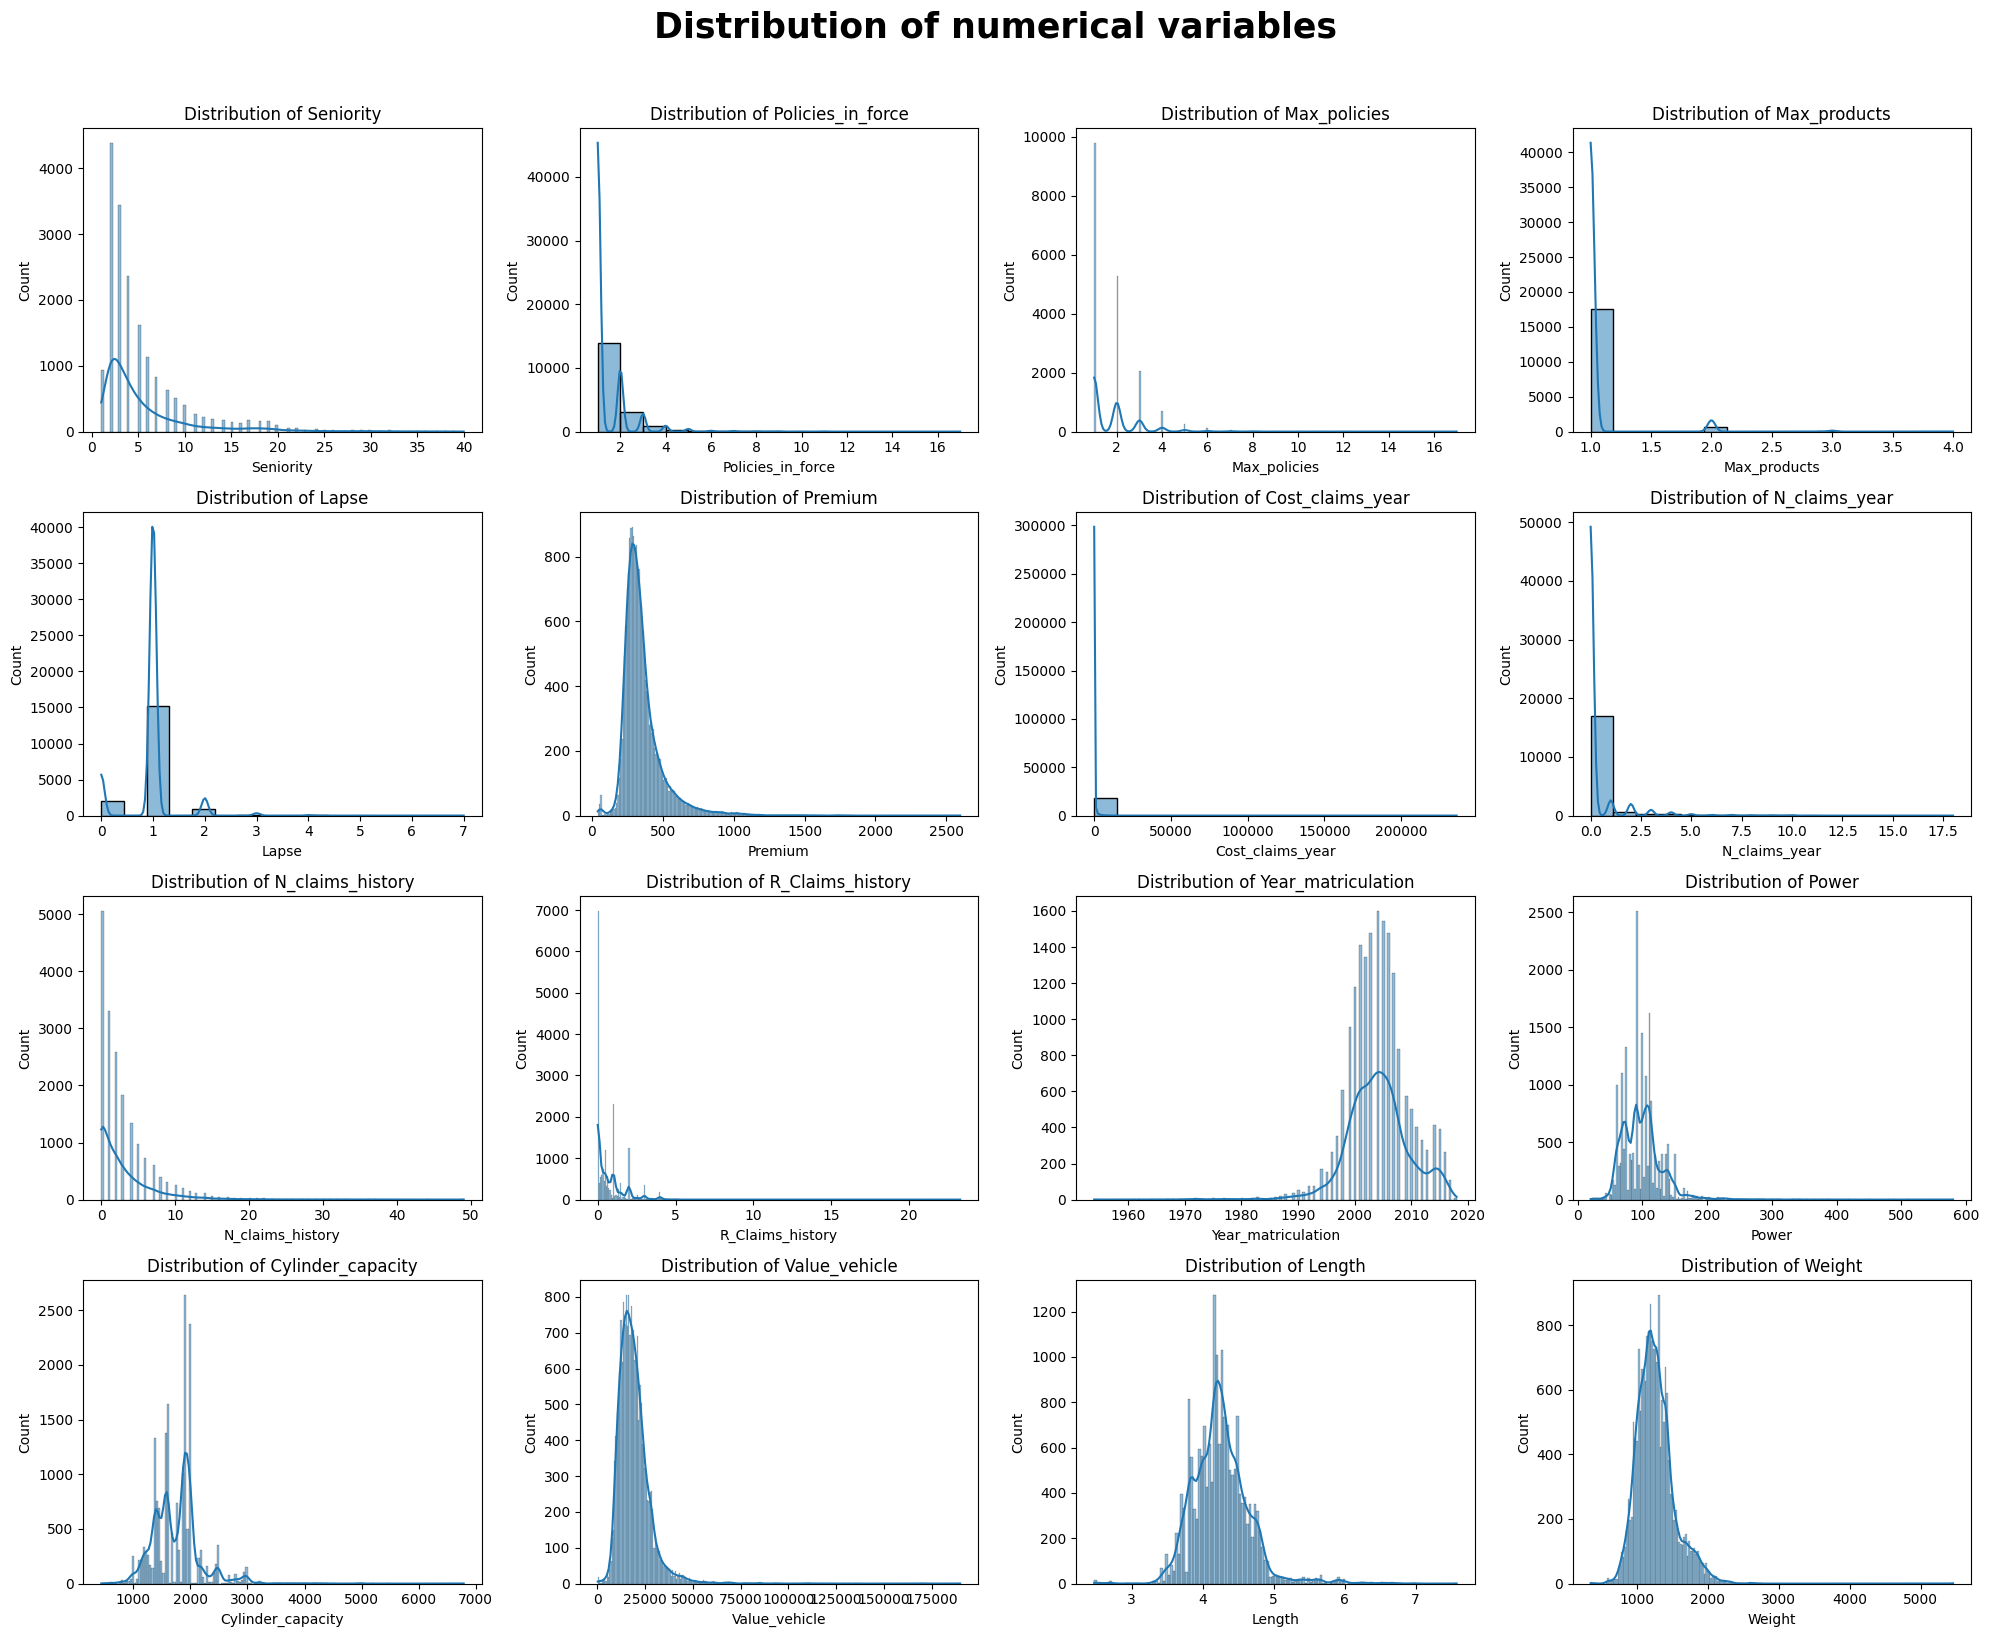

In [14]:
n_cols = 4
n_vars = len(numeric_cols)
n_rows = (n_vars + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(data=df.dropna(), x=col, ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')

# Hide unused subplots
for j in range(n_vars, len(axes)):
    axes[j].set_visible(False)

fig.suptitle("Distribution of numerical variables", size=25,fontweight='bold', y=1.02)

plt.tight_layout()
plt.show()

#### Distribution of categorical values

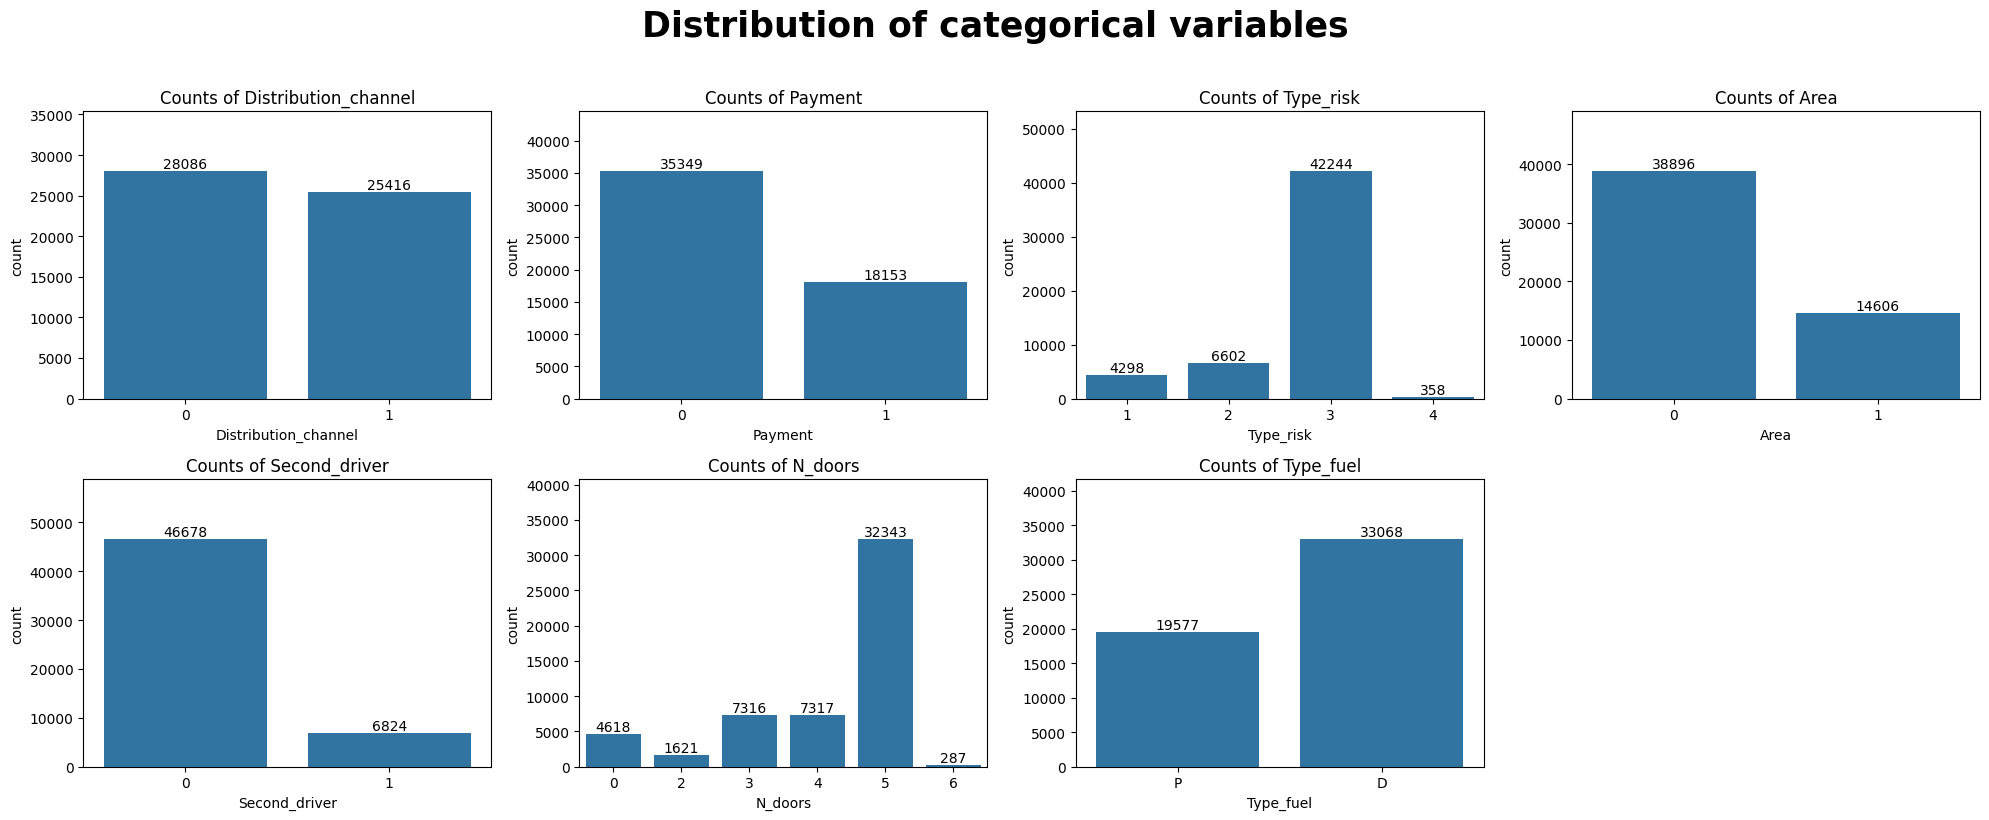

In [15]:
n_cols = 4 
n_rows = (len(cat_cols) + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*5, n_rows*4))
axes = axes.flatten()  

for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Counts of {col}')
    
    # Add count labels on bars
    for container in axes[i].containers:
        axes[i].bar_label(container)
    
    # Increase y-limit by 20%
    current_ylim = axes[i].get_ylim()
    axes[i].set_ylim([0, current_ylim[1] * 1.2])

# Hide unused subplots
for j in range(len(cat_cols), len(axes)):
    axes[j].set_visible(False)

fig.suptitle("Distribution of categorical variables", size=25,fontweight='bold', y=1.02)

plt.tight_layout()
plt.show()

### Multivariate Analysis

#### Correlation Matrix

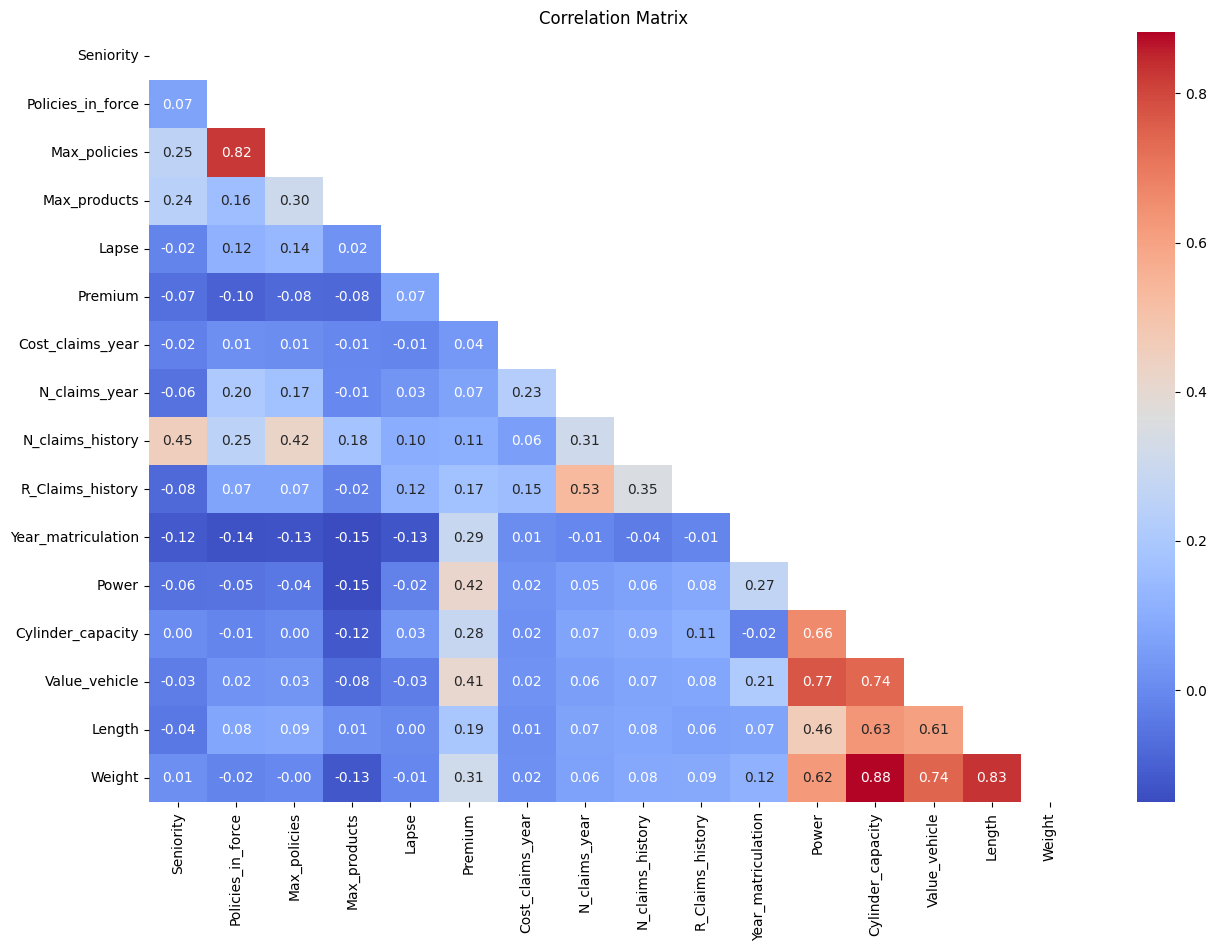

In [16]:
# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot heatmap with upper triangle only
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()